In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = "netflix_titles.csv"
data = pd.read_csv(file)
data.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [4]:
rename_data = data.rename(columns={"show_id": "Show ID", "type": "Type", "title": "Title", "director": "Director",
                            "cast": "Cast", "country": "Country", "date_added": "Date Added", "release_year": "Release Year",
                            "rating": "Rating", "duration": "Duration", "listed_in": "Genre", "description": "Description"})
rename_data

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [5]:
# Se quitan los datos tipo NaN
clean_data = rename_data.replace(np.NaN, 'n') # Porque n? Eso yo no lo puse XD

In [6]:
# SPLIT DATA
# Separar los generos
# intilize a null list 
genre_list = [] 
genre_count = {}

for listed_in in clean_data['Genre']:
    split_genres = [x.strip() for x in listed_in.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
    
    # Aqui puedo hacer el diccionario para que me vaya guardando cada valor y me cuente los elementos que hay en géneros  
    # traverse for all elements 
    for i in range(len(split_genres)): 
        # check if exists in unique_list or not 
        if split_genres[i] not in genre_list: 
            genre_list.append(split_genres[i]) 
            
        if split_genres[i] in genre_count:
            genre_count[split_genres[i]] = genre_count[split_genres[i]] + 1
        else:
            genre_count[split_genres[i]] = 1

genre_count

{'Children & Family Movies': 378,
 'Comedies': 1113,
 'Stand-Up Comedy': 281,
 "Kids' TV": 328,
 'Crime TV Shows': 363,
 'International TV Shows': 1001,
 'Spanish-Language TV Shows': 117,
 'International Movies': 1927,
 'Sci-Fi & Fantasy': 193,
 'Thrillers': 392,
 'Docuseries': 279,
 'Science & Nature TV': 67,
 'Action & Adventure': 597,
 'Dramas': 1623,
 'Cult Movies': 55,
 'Independent Movies': 552,
 'Romantic Movies': 376,
 'Documentaries': 668,
 'Horror Movies': 262,
 'Romantic TV Shows': 278,
 'TV Comedies': 436,
 'TV Dramas': 599,
 'TV Thrillers': 44,
 'TV Mysteries': 69,
 'British TV Shows': 210,
 'Music & Musicals': 243,
 'Reality TV': 153,
 'TV Action & Adventure': 126,
 'Anime Features': 45,
 'Teen TV Shows': 44,
 'Faith & Spirituality': 47,
 'Korean TV Shows': 132,
 'Anime Series': 117,
 'LGBTQ Movies': 60,
 'TV Horror': 54,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 42,
 'TV Sci-Fi & Fantasy': 68,
 'Classic Movies': 84,
 'Sports Movies': 157,
 'TV Shows': 10,
 'Classic

In [7]:
# Ahora a splitter los paises muajaja
# Separar los paises
# intilize a null list and dict
country_list = [] 
country_count = {}

for listed_in in clean_data['Country']:
    split_country = [x.strip() for x in listed_in.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
  
    # traverse for all elements 
    for j in range(len(split_country)): 
        # check if exists in unique_list or not 
        if split_country[j] not in country_list: 
            country_list.append(split_country[j]) 
            
        if split_country[j] in country_count:
            country_count[split_country[j]] = country_count[split_country[j]] + 1
        else:
            country_count[split_country[j]] = 1
            
country_count

{'United States': 2610,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 602,
 'Spain': 178,
 'Bulgaria': 8,
 'Canada': 318,
 'Chile': 23,
 'Denmark': 38,
 'Sweden': 33,
 'n': 476,
 'Netherlands': 37,
 'Belgium': 66,
 'France': 271,
 'Uruguay': 9,
 '': 3,
 'Thailand': 56,
 'Pakistan': 23,
 'Turkey': 87,
 'Brazil': 66,
 'Italy': 67,
 'Indonesia': 52,
 'Ireland': 33,
 'Hong Kong': 97,
 'Morocco': 6,
 'Mexico': 129,
 'Vietnam': 4,
 'Argentina': 68,
 'Nigeria': 36,
 'Japan': 231,
 'Germany': 151,
 'Greece': 8,
 'Norway': 21,
 'Switzerland': 15,
 'United Arab Emirates': 21,
 'Lebanon': 9,
 'Cambodia': 3,
 'Russia': 21,
 'Poland': 27,
 'Israel': 26,
 'Australia': 126,
 'Portugal': 4,
 'Egypt': 54,
 'Taiwan': 75,
 'Austria': 10,
 'Czech Republic': 15,
 'Senegal': 2,
 'Soviet Union': 3,
 'Peru': 9,
 'Ukraine': 3,
 'Malaysia': 21,
 'South Africa': 30,
 'Nepal': 2,
 'Philippines': 47,
 'Serbia': 5,
 'Colombia': 36,
 'Singapore': 30,
 'Luxembourg': 7,
 'West Germany': 5,
 'Ca

In [8]:
country_list.remove('n')
country_list.remove('')

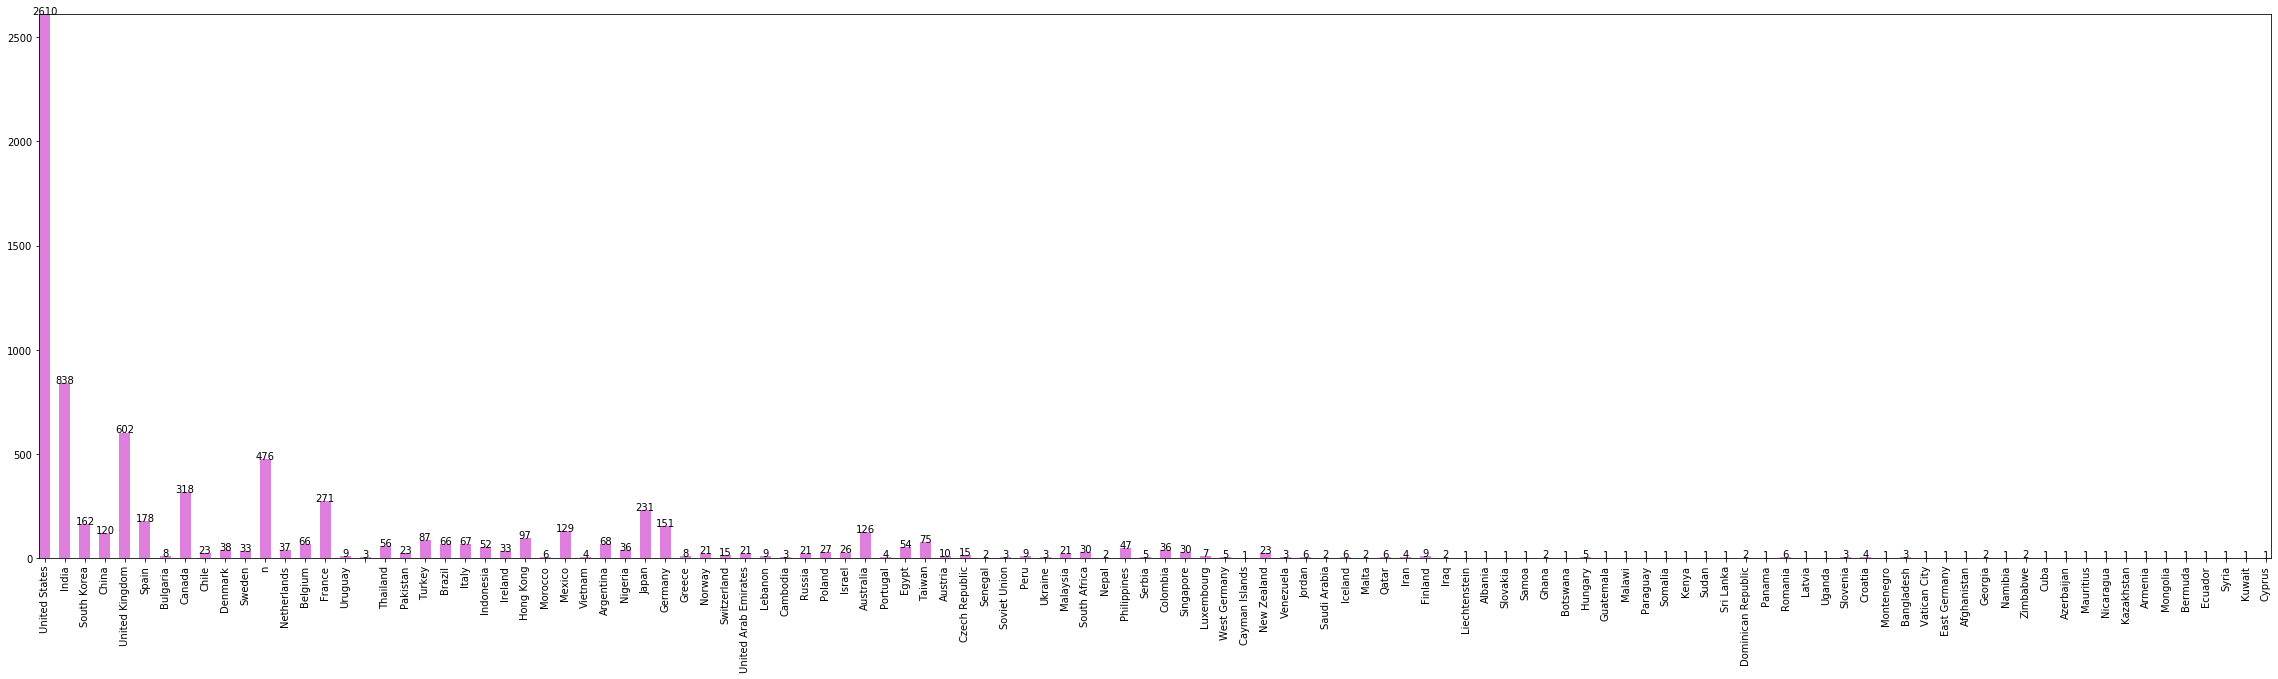

In [9]:
# Set x axis and tick locations
x_axis = np.arange(len(country_count.keys()))
tick_locations = [value for value in x_axis]
width = 0.55
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(40,10))
plt.bar(x_axis, country_count.values(), width=width, color='m', alpha=0.5) #, align="center")
#plt.annotate(country_count.values(), xy=country_count.values())
plt.xticks(tick_locations, country_count.keys(), rotation="vertical")
plt.autoscale(tight=True)

for i, v in enumerate(country_count.values()):
    plt.text(i, v, str(v), color='k', ha='center')


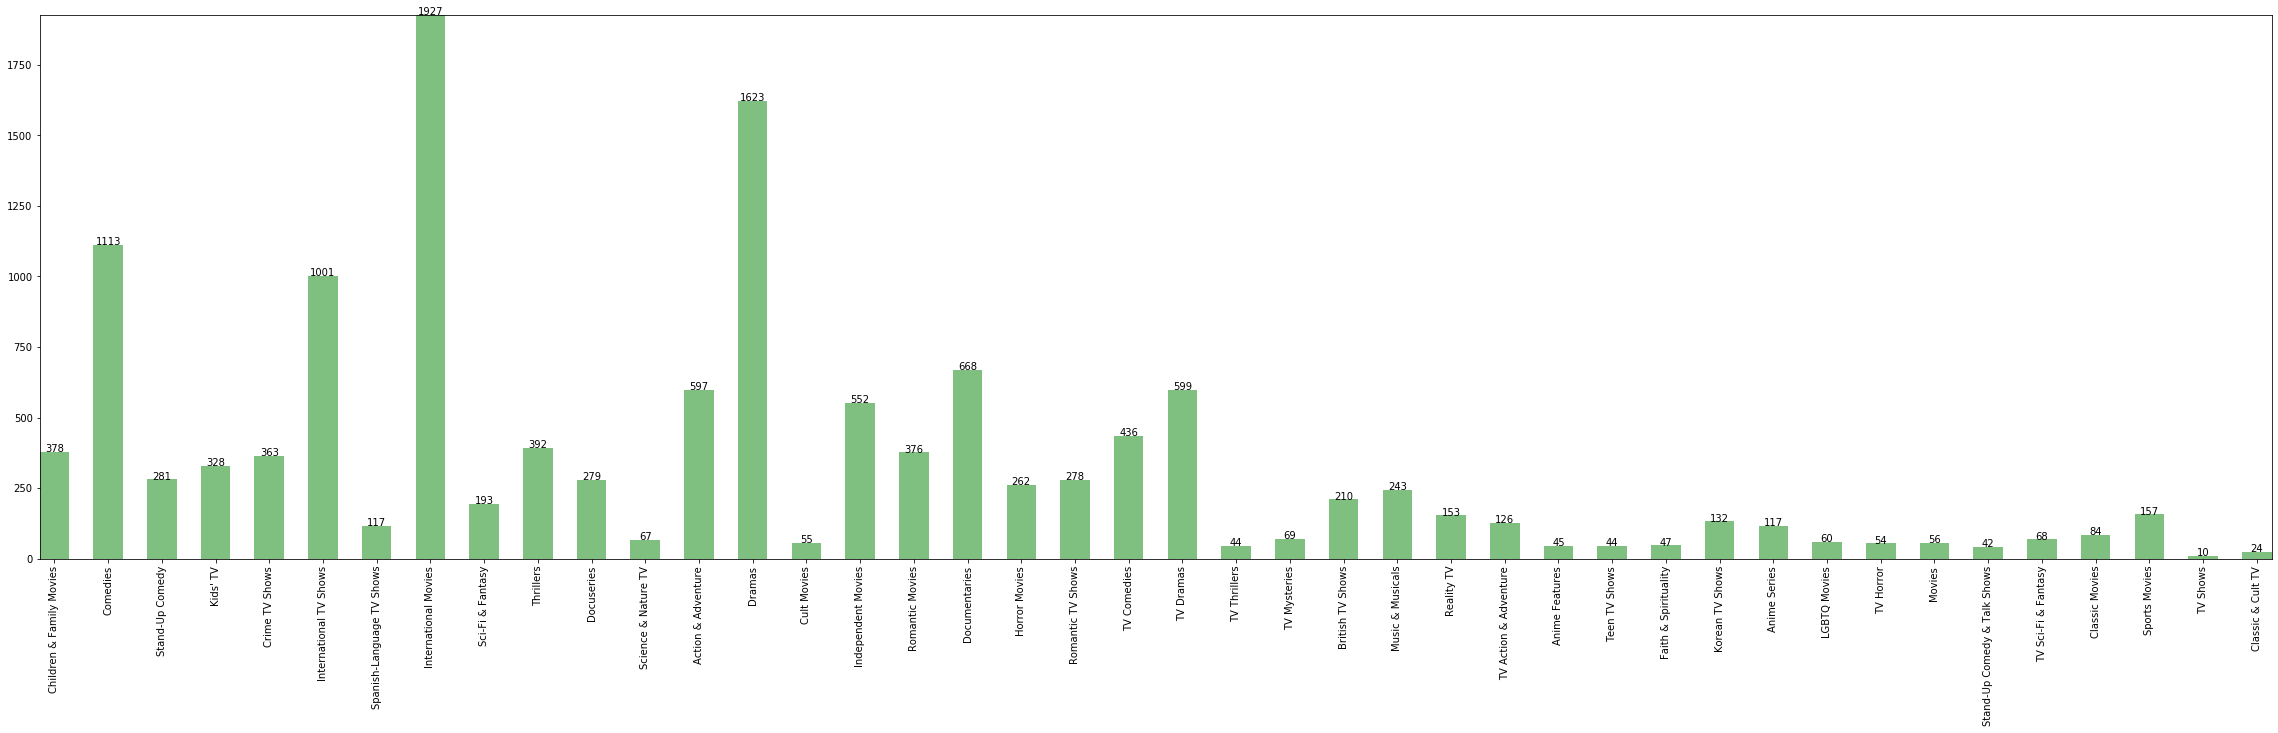

In [10]:
# For GENRES

# Set x axis and tick locations
x_axis = np.arange(len(genre_count.keys()))
tick_locations = [value for value in x_axis]
width = 0.55
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(40,10))
plt.bar(x_axis, genre_count.values(), width=width, color='green', alpha=0.5) #, align="center")
#plt.annotate(country_count.values(), xy=country_count.values())
plt.xticks(tick_locations, genre_count.keys(), rotation="vertical")
plt.autoscale(tight=True)

for i, v in enumerate(genre_count.values()):
    plt.text(i, v, str(v), color='k', ha='center')


In [11]:
# === Esta ya es la parte de matrices para contar los generos por pais ===

#Matriz de conteos
matrizRes=np.zeros((len(country_list),len(genre_list)))

# Segun yo estos campos ya son listas, probare primero sin y luego con
#ctmp=list(clean_data['Country'].values)
#gtmp=list(clean_data['Genre'].values)

country_values = clean_data['Country'].values
genre_values = clean_data['Genre'].values

# La lectura del dataset
for i in range(len(country_values)):
#    print(i)
    c_values = country_values[i].split(',')
#    print(cstmp)
    for k in range(len(country_values)):
        g_values = genre_values[i].split(',')
#            print(gctmp)
        for j in range(len(g_values)): # Este es el ciclo que corre el arreglo de generos
            try:
                matrizRes[country_list.index(c_values[k].strip()),genre_list.index(g_values[j].strip())] = matrizRes[country_list.index(c_values[k].strip()),genre_list.index(g_values[j].strip())]+1
            except:
                print('Error')

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Erro

KeyboardInterrupt: 

In [12]:
country_values = clean_data['Country'].values
genre_values = clean_data['Genre'].values


print(len(country_values))
len(genre_values)

6234


6234

In [13]:
df_genre_country = pd.DataFrame(data=matrizRes, index=country_list, columns=genre_list)
df_genre_country

,Children & Family Movies,Comedies,Stand-Up Comedy,Kids' TV,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,International Movies,Sci-Fi & Fantasy,Thrillers,...,Anime Series,LGBTQ Movies,TV Horror,Movies,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,Classic Movies,Sports Movies,TV Shows,Classic & Cult TV
United States,1.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
India,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South Korea,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
China,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
United Kingdom,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ecuador,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Syria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kuwait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
matrizRes=np.zeros((len(country_list),len(genre_list)))
ctmp=list(clean_data['Country'].values)
gtmp=list(clean_data['Genre'].values)

for i in range(len(ctmp)):
    print(i)
    cstmp=ctmp[i].split(',')
    print(cstmp)
    for k in range(len(cstmp)):
        gctmp=gtmp[i].split(',')
        print(gctmp)
        for j in range(len(gctmp)):
            try:
                matrizRes[country_list.index(cstmp[k].strip()),genre_list.index(gctmp[j].strip())]=matrizRes[country_list.index(cstmp[k].strip()),genre_list.index(gctmp[j].strip())]+1
            except:
                print('valor raro')


0
['United States', ' India', ' South Korea', ' China']
['Children & Family Movies', ' Comedies']
['Children & Family Movies', ' Comedies']
['Children & Family Movies', ' Comedies']
['Children & Family Movies', ' Comedies']
1
['United Kingdom']
['Stand-Up Comedy']
2
['United States']
["Kids' TV"]
3
['United States']
["Kids' TV"]
4
['United States']
['Comedies']
5
['Spain']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
6
['Bulgaria', ' United States', ' Spain', ' Canada']
['International Movies', ' Sci-Fi & Fantasy', ' Thrillers']
['International Movies', ' Sci-Fi & Fantasy', ' Thrillers']
['International Movies', ' Sci-Fi & Fantasy', ' Thrillers']
['International Movies', ' Sci-Fi & Fantasy', ' Thrillers']
7
['Chile']
['Stand-Up Comedy']
8
['United States']
['Docuseries', ' Science & Nature TV']
9
['United States', ' United Kingdom', ' Denmark', ' Sweden']
['Action & Adventure', ' Thrillers']
['Action & Adventure', ' Thrillers']
['Action & Adventure', ' Th

570
['India']
['Dramas', ' International Movies']
571
['India']
['Dramas', ' International Movies', ' Thrillers']
572
['India']
['International Movies', ' Music & Musicals', ' Romantic Movies']
573
['India']
['Dramas', ' International Movies', ' Music & Musicals']
574
['India']
['International Movies', ' Music & Musicals', ' Romantic Movies']
575
['India']
['Dramas', ' International Movies', ' Sports Movies']
576
['India']
['Comedies', ' International Movies', ' Romantic Movies']
577
['United States']
['Comedies', ' Independent Movies']
578
['United Kingdom']
['Action & Adventure', ' Comedies', ' Independent Movies']
579
['Indonesia']
['Children & Family Movies', ' Dramas', ' International Movies']
580
['n']
['Crime TV Shows', ' International TV Shows', ' TV Dramas']
valor raro
valor raro
valor raro
581
['United States']
['TV Dramas', ' TV Thrillers']
582
['United States']
['Stand-Up Comedy']
583
['United States']
['Stand-Up Comedy']
584
['Peru']
['Comedies', ' International Movies', '

['United Kingdom']
['British TV Shows', ' Docuseries', ' International TV Shows']
1011
['United States', ' United Kingdom', ' Canada']
["Kids' TV", ' TV Action & Adventure', ' TV Comedies']
["Kids' TV", ' TV Action & Adventure', ' TV Comedies']
["Kids' TV", ' TV Action & Adventure', ' TV Comedies']
1012
['United States']
['Action & Adventure', ' Comedies', ' Romantic Movies']
1013
['United States']
['Comedies', ' Dramas', ' LGBTQ Movies']
1014
['France']
['Action & Adventure', ' Dramas', ' International Movies']
1015
['United States']
['Dramas']
1016
['Argentina', ' Chile']
['Dramas', ' International Movies']
['Dramas', ' International Movies']
1017
['United States']
['Dramas']
1018
['France', ' Belgium']
['Crime TV Shows', ' International TV Shows', ' TV Sci-Fi & Fantasy']
['Crime TV Shows', ' International TV Shows', ' TV Sci-Fi & Fantasy']
1019
['Thailand']
['International Movies', ' LGBTQ Movies', ' Romantic Movies']
1020
['Thailand']
['International Movies', ' LGBTQ Movies', ' Rom

1597
['China', ' Hong Kong']
['Action & Adventure', ' International Movies']
['Action & Adventure', ' International Movies']
1598
['Chile']
['Comedies', ' Dramas', ' International Movies']
1599
['Spain']
['Comedies', ' Dramas', ' International Movies']
1600
['Colombia', ' United States']
['International TV Shows', ' Romantic TV Shows', ' Spanish-Language TV Shows']
['International TV Shows', ' Romantic TV Shows', ' Spanish-Language TV Shows']
1601
['United States']
['Comedies', ' Romantic Movies']
1602
['India']
['Action & Adventure', ' Comedies', ' International Movies']
1603
['India']
['Comedies', ' Dramas', ' Independent Movies']
1604
['Germany']
['Crime TV Shows', ' International TV Shows', ' TV Comedies']
1605
['n']
['Crime TV Shows', ' Docuseries', ' International TV Shows']
valor raro
valor raro
valor raro
1606
['India']
['Comedies', ' International Movies', ' Music & Musicals']
1607
['India']
['Action & Adventure', ' Horror Movies', ' International Movies']
1608
['India']
['Dra

['India']
['Comedies', ' Dramas', ' International Movies']
2197
['Japan']
['Anime Features', ' Children & Family Movies', ' International Movies']
2198
['India']
['Comedies', ' Dramas', ' International Movies']
2199
['Sweden']
['Comedies', ' Dramas', ' International Movies']
2200
['India']
['Crime TV Shows', ' International TV Shows', ' TV Dramas']
2201
['Hungary']
['Action & Adventure', ' Dramas', ' International Movies']
2202
['India']
['Dramas', ' International Movies']
2203
['Australia']
['Children & Family Movies', ' Comedies']
2204
['Australia']
['Children & Family Movies', ' Comedies']
2205
['United States']
['Dramas', ' Independent Movies']
2206
['India']
['Documentaries', ' International Movies']
2207
['United States']
['TV Comedies', ' TV Sci-Fi & Fantasy']
2208
['Argentina']
['Dramas', ' International Movies']
2209
['India']
['Horror Movies', ' International Movies', ' Thrillers']
2210
['India']
['International TV Shows', ' Romantic TV Shows', ' TV Comedies']
2211
['India']


2801
['n']
['International TV Shows', ' Romantic TV Shows', ' TV Dramas']
valor raro
valor raro
valor raro
2802
['Singapore', ' Japan', ' France']
['Dramas', ' International Movies']
['Dramas', ' International Movies']
['Dramas', ' International Movies']
2803
['Canada', ' United States']
['Dramas', ' Thrillers']
['Dramas', ' Thrillers']
2804
['Hong Kong']
['Action & Adventure', ' International Movies']
2805
['n']
['International TV Shows', ' Romantic TV Shows', ' TV Dramas']
valor raro
valor raro
valor raro
2806
['Hong Kong']
['Action & Adventure', ' Cult Movies', ' International Movies']
2807
['United States']
['TV Comedies']
2808
['India']
['TV Shows']
2809
['n']
['International Movies', ' Thrillers']
valor raro
valor raro
2810
['Canada']
['Thrillers']
2811
['n']
['Stand-Up Comedy']
valor raro
2812
['Thailand']
['Comedies', ' Faith & Spirituality', ' International Movies']
2813
['Thailand']
['Comedies', ' Faith & Spirituality', ' International Movies']
2814
['Thailand']
['Horror Movi

3327
['n']
['International TV Shows', ' Romantic TV Shows', ' TV Dramas']
valor raro
valor raro
valor raro
3328
['United Kingdom']
['Action & Adventure', ' Classic Movies', ' Comedies']
3329
['United States']
['Documentaries', ' Horror Movies']
3330
['United States']
['Comedies', ' Dramas', ' Independent Movies']
3331
['France']
['Documentaries', ' International Movies']
3332
['United Kingdom']
['Documentaries']
3333
['United States']
['Stand-Up Comedy']
3334
['United States']
['Comedies']
3335
['United States']
['Horror Movies', ' Thrillers']
3336
['United States']
['Comedies', ' Independent Movies']
3337
['United States', ' United Kingdom', ' France', ' Germany', ' Japan']
['Dramas', ' Independent Movies']
['Dramas', ' Independent Movies']
['Dramas', ' Independent Movies']
['Dramas', ' Independent Movies']
['Dramas', ' Independent Movies']
3338
['United Kingdom', ' United States']
['Action & Adventure', ' International Movies']
['Action & Adventure', ' International Movies']
3339
['U

['Dramas', ' International Movies', ' Romantic Movies']
3815
['Philippines']
['Dramas', ' International Movies', ' Romantic Movies']
3816
['Philippines']
['Comedies', ' International Movies']
3817
['United States']
['Crime TV Shows', ' TV Dramas']
3818
['Philippines']
['Comedies', ' Dramas', ' International Movies']
3819
['Philippines']
['Comedies', ' International Movies', ' Romantic Movies']
3820
['United Kingdom']
['Movies']
3821
['United States']
['Stand-Up Comedy']
3822
['India']
['Action & Adventure', ' International Movies']
3823
['United States']
['Stand-Up Comedy']
3824
['United States']
['Comedies', ' Dramas', ' Independent Movies']
3825
['United States']
['Stand-Up Comedy']
3826
['United States']
['Comedies', ' Dramas', ' Romantic Movies']
3827
['United States']
['Dramas', ' Independent Movies']
3828
['Serbia', ' South Korea', ' Slovenia']
['Horror Movies', ' Independent Movies', ' Sci-Fi & Fantasy']
['Horror Movies', ' Independent Movies', ' Sci-Fi & Fantasy']
['Horror Movi

['Dramas']
['Dramas']
['Dramas']
4410
['Poland', ' United States']
['TV Action & Adventure', ' TV Dramas', ' TV Mysteries']
['TV Action & Adventure', ' TV Dramas', ' TV Mysteries']
4411
['United Kingdom']
['Sci-Fi & Fantasy']
4412
['Singapore']
['Horror Movies', ' International Movies']
4413
['Japan']
['Movies']
4414
['Japan']
['Anime Series', ' Crime TV Shows', ' International TV Shows']
4415
['Singapore']
['Action & Adventure', ' International Movies']
4416
['Singapore']
['International Movies', ' Thrillers']
4417
['Singapore']
['Dramas', ' International Movies', ' Thrillers']
4418
['Canada']
['Children & Family Movies', ' Comedies']
4419
['Australia']
['International TV Shows', ' Romantic TV Shows', ' TV Dramas']
4420
['Mexico', ' United States']
['Documentaries']
['Documentaries']
4421
['France', ' South Korea', ' Japan']
['Movies']
['Movies']
['Movies']
4422
['Argentina']
['Action & Adventure', ' Horror Movies', ' International Movies']
4423
['United States']
['Stand-Up Comedy']
4

['n']
['Docuseries', ' International TV Shows', ' Spanish-Language TV Shows']
valor raro
valor raro
valor raro
5002
['n']
['Docuseries', ' International TV Shows']
valor raro
valor raro
5003
['India']
['Comedies', ' International Movies', ' Music & Musicals']
5004
['Turkey']
['Crime TV Shows', ' International TV Shows', ' TV Dramas']
5005
['Australia', ' Armenia', ' Japan', ' Jordan', ' Mexico', ' Mongolia', ' New Zealand', ' Philippines', ' South Africa', ' Sweden', ' United States', ' Uruguay']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' International Movies']
['Documentaries', ' Inter

['Classic & Cult TV', ' TV Horror', ' TV Mysteries']
5586
['United States']
['Crime TV Shows', ' TV Action & Adventure', ' TV Dramas']
5587
['United States']
["Kids' TV"]
5588
['United States']
['TV Action & Adventure', ' TV Comedies']
5589
['Spain']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
5590
['United Kingdom']
['British TV Shows', ' Docuseries', ' International TV Shows']
5591
['United States']
['TV Dramas', ' TV Sci-Fi & Fantasy']
5592
['United States']
['TV Dramas']
5593
['United States']
['TV Dramas', ' TV Mysteries', ' TV Sci-Fi & Fantasy']
5594
['United States']
['Crime TV Shows', ' TV Action & Adventure', ' TV Dramas']
5595
['United States']
['TV Comedies']
5596
['Canada']
["Kids' TV"]
5597
['South Korea', ' United States']
["Kids' TV", ' TV Comedies']
["Kids' TV", ' TV Comedies']
5598
['Argentina']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
5599
['United States']
['Docuseries']
5600
['Norway']
['Internationa

['British TV Shows', ' International TV Shows', ' Romantic TV Shows']
6191
['Japan']
['Anime Series', ' International TV Shows']
6192
['Canada']
['TV Comedies']
6193
['United States']
['TV Action & Adventure', ' TV Comedies', ' TV Horror']
6194
['Mexico', ' United States']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
6195
['n']
['International TV Shows', ' TV Dramas', ' TV Horror']
valor raro
valor raro
valor raro
6196
['Spain']
['Crime TV Shows', ' International TV Shows', ' Spanish-Language TV Shows']
6197
['United States']
['International TV Shows', ' Reality TV', ' Spanish-Language TV Shows']
6198
['Turkey']
['International TV Shows', ' Romantic TV Shows', ' TV Action & Adventure']
6199
['n']
['International TV Shows', ' Romantic TV Shows', ' TV Comedies']
valor raro
valor raro
valor raro
6200
['United States']
["Kids' TV", ' TV Comedies']
6201
['United States']
["Kids' TV", '

In [15]:
df = pd.DataFrame(data=matrizRes, index=country_list, columns=genre_list)
print(df)

                Children & Family Movies  Comedies  Stand-Up Comedy  Kids' TV  \
United States                      258.0     447.0            186.0     157.0   
India                               15.0     246.0              1.0       5.0   
South Korea                          5.0      10.0              2.0      16.0   
China                                9.0      23.0              0.0       4.0   
United Kingdom                      24.0      67.0             17.0      21.0   
...                                  ...       ...              ...       ...   
Bermuda                              0.0       0.0              0.0       0.0   
Ecuador                              0.0       0.0              0.0       0.0   
Syria                                0.0       0.0              0.0       0.0   
Kuwait                               0.0       0.0              0.0       0.0   
Cyprus                               0.0       0.0              0.0       1.0   

                Crime TV Sh